In [100]:
import pandas as pd
file_path = '/content/movie_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm it loaded correctly
print(data.head())  # Shows the first 5 rows by default

            Movie Title  tmdb_popularity  mean_google_trend_popularity  \
0    Intimate Strangers            2.791                        41.250   
1            Aftershock           17.804                        60.625   
2  The Eleventh Chapter            1.342                        12.500   
3        Spanish Affair            0.948                        29.750   
4                 Gantz           40.465                        46.625   

   actors_popularity  TwitterScore  Action  Adventure  Animation  Biography  \
0             8.4862     81.954887       0          0          0          0   
1             6.0420     33.419857       1          1          0          0   
2             7.3250     15.789474       0          0          0          0   
3             2.5464     53.846154       0          0          0          0   
4             5.7664     38.750000       1          0          0          0   

   Comedy  ...  Musical  Mystery  Romance  Sci-Fi  Short  Sport  Thriller  \
0  

In [101]:
data.head()

,Movie Title,tmdb_popularity,mean_google_trend_popularity,actors_popularity,TwitterScore,Action,Adventure,Animation,Biography,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Verdict
0,Intimate Strangers,2.791,41.250,8.4862,81.954887,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Aftershock,17.804,60.625,6.0420,33.419857,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,The Eleventh Chapter,1.342,12.500,7.3250,15.789474,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,Spanish Affair,0.948,29.750,2.5464,53.846154,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gantz,40.465,46.625,5.7664,38.750000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [102]:
df= data

In [103]:
def encode_genre(row):
    genres = ["Action", "Adventure", "Animation", "Biography", "Comedy", "Drama", "Fantasy", "History", "Horror", "Music", "Musical", "Mystery", "Romance", "Sci-Fi", "Short", "Sport", "Thriller", "War", "Western"]
    for i, genre in enumerate(genres, start=1):
        if row[genre] == 1:
            return i
    return 0  # If no genre is found, return 0 or handle it according to your requirement

# Apply the function to create the 'genre' column
df['genre'] = df.apply(encode_genre, axis=1)

# Drop all other genre columns
df.drop(columns=df.columns[5:-2], inplace=True)

print(df[['Movie Title', 'genre']])

               Movie Title  genre
0       Intimate Strangers      6
1               Aftershock      1
2     The Eleventh Chapter      5
3           Spanish Affair      6
4                    Gantz      1
...                    ...    ...
1613   Gangubai Kathiawadi      4
1614          The Bad Guys      2
1615      The Tiger Rising      0
1616   The King's Daughter      1
1617     Bachchhan Paandey      1

[1618 rows x 2 columns]


In [104]:
df

,Movie Title,tmdb_popularity,mean_google_trend_popularity,actors_popularity,TwitterScore,Verdict,genre
0,Intimate Strangers,2.791,41.250,8.4862,81.954887,1,6
1,Aftershock,17.804,60.625,6.0420,33.419857,1,1
2,The Eleventh Chapter,1.342,12.500,7.3250,15.789474,1,5
3,Spanish Affair,0.948,29.750,2.5464,53.846154,1,6
4,Gantz,40.465,46.625,5.7664,38.750000,1,1
...,...,...,...,...,...,...,...
1613,Gangubai Kathiawadi,15.273,61.250,2.6716,0.549637,0,4
1614,The Bad Guys,708.384,64.875,18.3420,-34.854246,0,2
1615,The Tiger Rising,7.013,21.375,9.3652,0.635220,0,0
1616,The King's Daughter,172.511,55.000,27.3014,0.351178,0,1


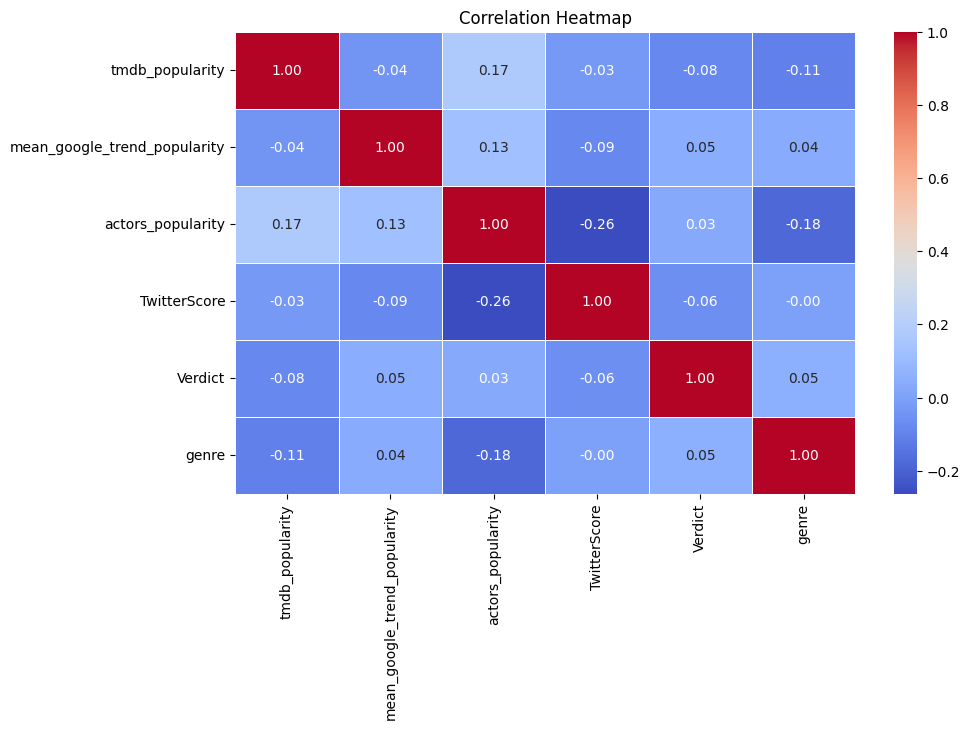

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number'])

# Create a heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [106]:
# Check for null values in each column
null_values = df.isnull().sum()

print("Null values in each column:")
print(null_values)


Null values in each column:
Movie Title                      0
tmdb_popularity                  0
mean_google_trend_popularity    93
actors_popularity                8
TwitterScore                    65
Verdict                          0
genre                            0
dtype: int64


In [107]:
# Calculate percentage of null values in each column
total_rows = df.shape[0]
percentage_null_values = (null_values / total_rows) * 100

print("Percentage of null values in each column:")
print(percentage_null_values)


Percentage of null values in each column:
Movie Title                     0.000000
tmdb_popularity                 0.000000
mean_google_trend_popularity    5.747837
actors_popularity               0.494438
TwitterScore                    4.017305
Verdict                         0.000000
genre                           0.000000
dtype: float64


In [108]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Impute null values with mean for numeric columns
df_imputed = numeric_columns.fillna(numeric_columns.mean())

# Concatenate imputed numeric columns with non-numeric columns
df_imputed = pd.concat([df.drop(columns=numeric_columns.columns), df_imputed], axis=1)

# Check the resulting DataFrame
print(df_imputed)


               Movie Title  tmdb_popularity  mean_google_trend_popularity  \
0       Intimate Strangers            2.791                        41.250   
1               Aftershock           17.804                        60.625   
2     The Eleventh Chapter            1.342                        12.500   
3           Spanish Affair            0.948                        29.750   
4                    Gantz           40.465                        46.625   
...                    ...              ...                           ...   
1613   Gangubai Kathiawadi           15.273                        61.250   
1614          The Bad Guys          708.384                        64.875   
1615      The Tiger Rising            7.013                        21.375   
1616   The King's Daughter          172.511                        55.000   
1617     Bachchhan Paandey            8.418                        24.625   

      actors_popularity  TwitterScore  Verdict  genre  
0                8.

In [109]:
# Drop rows with NaN values
df_cleaned = df.dropna()

# Check the resulting DataFrame
print(df_cleaned)


               Movie Title  tmdb_popularity  mean_google_trend_popularity  \
0       Intimate Strangers            2.791                        41.250   
1               Aftershock           17.804                        60.625   
2     The Eleventh Chapter            1.342                        12.500   
3           Spanish Affair            0.948                        29.750   
4                    Gantz           40.465                        46.625   
...                    ...              ...                           ...   
1613   Gangubai Kathiawadi           15.273                        61.250   
1614          The Bad Guys          708.384                        64.875   
1615      The Tiger Rising            7.013                        21.375   
1616   The King's Daughter          172.511                        55.000   
1617     Bachchhan Paandey            8.418                        24.625   

      actors_popularity  TwitterScore  Verdict  genre  
0                8.

In [110]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_cleaned[['tmdb_popularity', 'mean_google_trend_popularity', 'actors_popularity', 'TwitterScore', 'genre']]
y = df_cleaned['Verdict']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the class distribution in the training and testing sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Verdict
1    0.897605
0    0.102395
Name: proportion, dtype: float64

Testing set class distribution:
Verdict
1    0.89769
0    0.10231
Name: proportion, dtype: float64


In [111]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
# Create a logistic regression model
model = HistGradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


In [112]:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Multi-layer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models and evaluate accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.2f}")


Logistic Regression: Accuracy = 0.90
Decision Tree: Accuracy = 0.83
Random Forest: Accuracy = 0.89
SVM: Accuracy = 0.90
Gradient Boosting Classifier: Accuracy = 0.89
Naive Bayes: Accuracy = 0.89
AdaBoost: Accuracy = 0.90
Multi-layer Perceptron: Accuracy = 0.90


In [113]:
from sklearn.metrics import classification_report

# Define a dictionary to store models with accuracy above 85%
models_above_85 = {}

# Calculate classification reports for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if accuracy is above 85%
    if accuracy > 0.85:
        # Store the model in the dictionary
        models_above_85[name] = model

        # Generate and print the classification report
        report = classification_report(y_test, y_pred)
        print(f"Model: {name}\nAccuracy: {accuracy:.2f}\nClassification Report:\n{report}\n")


Model: Logistic Regression
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.90      1.00      0.95       272

    accuracy                           0.90       303
   macro avg       0.95      0.52      0.51       303
weighted avg       0.91      0.90      0.86       303


Model: Random Forest
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        31
           1       0.90      0.99      0.95       272

    accuracy                           0.90       303
   macro avg       0.70      0.53      0.53       303
weighted avg       0.86      0.90      0.86       303


Model: SVM
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.90      1.00      0.95       272

    acc

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Gradient Boosting Classifier
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.06      0.11        31
           1       0.90      0.99      0.94       272

    accuracy                           0.89       303
   macro avg       0.65      0.53      0.53       303
weighted avg       0.85      0.89      0.86       303


Model: Naive Bayes
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.13      0.19        31
           1       0.91      0.97      0.94       272

    accuracy                           0.89       303
   macro avg       0.64      0.55      0.57       303
weighted avg       0.85      0.89      0.86       303


Model: AdaBoost
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       0.90      1.00      0.95       

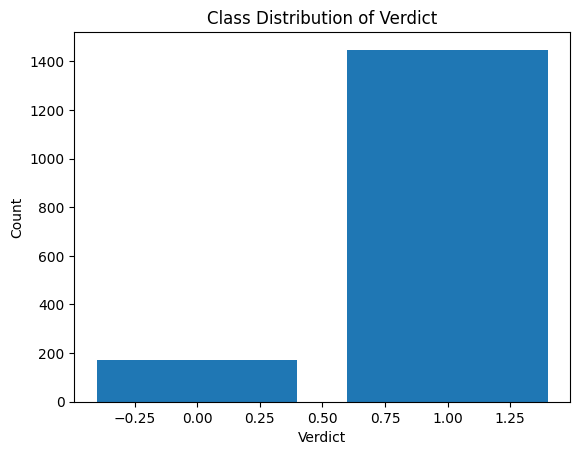

Class counts:
Verdict
1    1448
0     170
Name: count, dtype: int64


In [114]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Verdict'].value_counts()

# Visualize the distribution
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Verdict')
plt.ylabel('Count')
plt.title('Class Distribution of Verdict')
plt.show()

# Print the class counts
print("Class counts:")
print(class_counts)


In [115]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
# Random under-sampling
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)
print("After random under-sampling:")
print(Counter(y_resampled_rus))

# Random over-sampling
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)
print("\nAfter random over-sampling:")
print(Counter(y_resampled_ros))

# SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)
print("\nAfter SMOTE:")
print(Counter(y_resampled_smote))

After random under-sampling:
Counter({0: 155, 1: 155})

After random over-sampling:
Counter({1: 1359, 0: 1359})

After SMOTE:
Counter({1: 1359, 0: 1359})


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define features (X) and target variable (y) for each resampled dataset
datasets = {
    "Random Under-sampling": (X_resampled_rus, y_resampled_rus),
    "Random Over-sampling": (X_resampled_ros, y_resampled_ros),
    "SMOTE": (X_resampled_smote, y_resampled_smote)
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Multi-layer Perceptron": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Iterate over each resampled dataset and train each model
for resampling_technique, (X_resampled, y_resampled) in datasets.items():
    print(f"\nUsing {resampling_technique}:")
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name}: Accuracy = {accuracy:.2f}")



Using Random Under-sampling:
Logistic Regression: Accuracy = 0.61
Decision Tree: Accuracy = 0.48
Random Forest: Accuracy = 0.53
SVM: Accuracy = 0.50
Gradient Boosting Classifier: Accuracy = 0.52
Naive Bayes: Accuracy = 0.52
AdaBoost: Accuracy = 0.55
Multi-layer Perceptron: Accuracy = 0.55

Using Random Over-sampling:
Logistic Regression: Accuracy = 0.55
Decision Tree: Accuracy = 0.95
Random Forest: Accuracy = 0.98
SVM: Accuracy = 0.57
Gradient Boosting Classifier: Accuracy = 0.85
Naive Bayes: Accuracy = 0.56
AdaBoost: Accuracy = 0.72
Multi-layer Perceptron: Accuracy = 0.64

Using SMOTE:
Logistic Regression: Accuracy = 0.54
Decision Tree: Accuracy = 0.78
Random Forest: Accuracy = 0.88
SVM: Accuracy = 0.62
Gradient Boosting Classifier: Accuracy = 0.75
Naive Bayes: Accuracy = 0.57
AdaBoost: Accuracy = 0.74
Multi-layer Perceptron: Accuracy = 0.65


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with 5-fold cross-validation for each resampled dataset
for resampling_technique, (X_resampled, y_resampled) in datasets.items():
    print(f"\nUsing {resampling_technique}:")
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)

    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)

    # Evaluate the best model on the holdout test set
    best_rf_clf = grid_search.best_estimator_
    y_pred = best_rf_clf.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Using Random Under-sampling:


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       272
           1       0.86      0.70      0.77       272

    accuracy                           0.79       544
   macro avg       0.80      0.79      0.79       544
weighted avg       0.80      0.79      0.79       544


Using Random Over-sampling:
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       272
           1       0.69      1.00      0.81       272

    accuracy                           0.77       544
   macro avg       0.84      0.77      0.76       544
weighted avg       0.84      0.77      0.76       544


Using SMOTE:
Best Hyperparameters: {'max_depth': 

In [118]:
from sklearn.metrics import classification_report

# Define a dictionary to store models with accuracy above 85%
models_above_85 = {}

# Calculate classification reports for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if accuracy is above 85%
    if accuracy > 0.85:
        # Store the model in the dictionary
        models_above_85[name] = model

        # Generate and print the classification report
        report = classification_report(y_test, y_pred)
        print(f"Model: {name}\nAccuracy: {accuracy:.2f}\nClassification Report:\n{report}\n")


Model: Random Forest
Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       272
           1       0.89      0.86      0.87       272

    accuracy                           0.88       544
   macro avg       0.88      0.88      0.88       544
weighted avg       0.88      0.88      0.88       544




In [128]:
import pickle

# Define a dictionary to store models with accuracy above 85%
models_above_85 = {}

# Calculate classification reports for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if accuracy is above 85%
    if accuracy > 0.85:
        # Store the model in the dictionary
        models_above_85[name] = model

        # Generate and print the classification report
        report = classification_report(y_test, y_pred)
        print(f"Model: {name}\nAccuracy: {accuracy:.2f}\nClassification Report:\n{report}\n")

        # Save the model to a file using pickle
        filename = f"{name}_model.pkl"
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
            print(f"Model saved as {filename}\n")


Model: Random Forest
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       272
           1       0.91      0.86      0.88       272

    accuracy                           0.89       544
   macro avg       0.89      0.89      0.89       544
weighted avg       0.89      0.89      0.89       544


Model saved as Random Forest_model.pkl



Model: Random Forest
Training Accuracy: 1.00
Testing Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       272
           1       0.88      0.86      0.87       272

    accuracy                           0.87       544
   macro avg       0.87      0.87      0.87       544
weighted avg       0.87      0.87      0.87       544


ROC AUC: 0.95


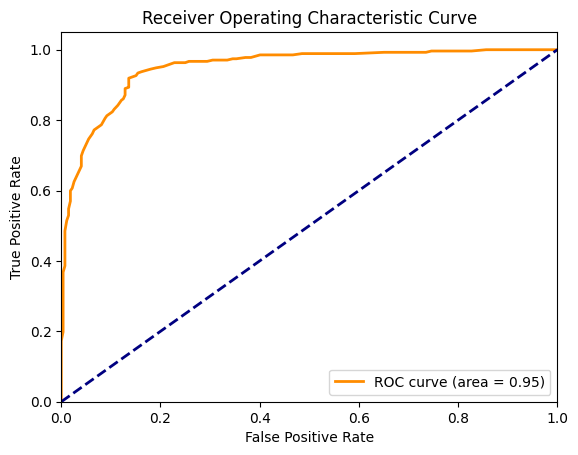

In [130]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define a dictionary to store models with accuracy above 85%
models_above_85 = {}

# Calculate classification reports for each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, y_pred)

    # Check if accuracy is above 85%
    if accuracy_test > 0.85:
        # Store the model in the dictionary
        models_above_85[name] = model

        # Generate and print the classification report
        report = classification_report(y_test, y_pred)
        print(f"Model: {name}\nTraining Accuracy: {accuracy_train:.2f}\nTesting Accuracy: {accuracy_test:.2f}\nClassification Report:\n{report}\n")

        # Calculate ROC AUC
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC: {roc_auc:.2f}")

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc="lower right")
        plt.show()


In [131]:
pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
